<a href="https://colab.research.google.com/github/AnshulJagotra/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

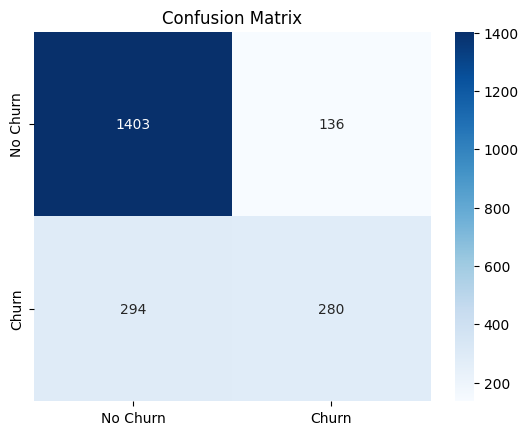

In [1]:
# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =============================
# 2. Load Dataset
# =============================
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

# =============================
# 3. Preprocessing
# =============================
# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object" and col != "customerID":
        df[col] = le.fit_transform(df[col])

print(df.head())

# Features & Target
X = df.drop(["customerID", "Churn"], axis=1)
y = df["Churn"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =============================
# 4. Model Training
# =============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# =============================
# 5. Predictions & Evaluation
# =============================
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =============================
# 6. Visualization
# =============================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix")
plt.show()
